In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [4]:
#**1）查看前5行（2分）
data = pd.read_csv("winequality-red.csv")


def test(quality):
    if quality > 4:
        return 1
    else:
        return 0


data["quality"] = data["quality"].map(test)
X = data.drop(columns="quality")
y = data["quality"]
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [ ]:
#**2）查看数据信息（2分）
data.info()

In [ ]:
#**3）查看基本统计信息（2分）
data.describe()

In [5]:
#**4）查看数据的行数和列数（2分）
data.shape

(1599, 12)

In [6]:
#**2、自主划分训练集、验证集或测试集(2分)
from sklearn.model_selection import train_test_split

X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#**3、自主选择两种算法进行数据建模。（2分）
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression(penalty='l2', C=1.0, fit_intercept=True, max_iter=1000)
#**训练模型
lr.fit(X_Train, y_train)
# ** 对训练集 跟测试集数据进行预测 
lr_train_pred = lr.predict(X_Train)
lr_test_pred = lr.predict(X_Test)
tree = DecisionTreeClassifier(splitter='best', max_depth=None, min_samples_leaf=2)
tree.fit(X_Train, y_train)
tree_train_pred = tree.predict(X_Train)
tree_test_pred = tree.predict(X_Test)

In [8]:
#**4、在训练集和测试集上测试该模型的准确性，并展示出该模型的训练准确率和测试准确率（5分）
from sklearn.metrics import accuracy_score

# ** 训练集 数据准确率 
lr_train_acc = accuracy_score(y_train, lr_train_pred)
#** 测试集 数据准确率
lr_test_acc = accuracy_score(y_test, lr_test_pred)
print(f"训练集{lr_train_acc},测试集{lr_test_acc}")
# ** 训练集 数据准确率 
tree_train_acc = accuracy_score(y_train, tree_train_pred)
#** 测试集 数据准确率
tree_test_acc = accuracy_score(y_test, tree_test_pred)
print(f"训练集{tree_train_acc},测试集{tree_test_acc}")

训练集0.9601250977326036,测试集0.965625
训练集0.9867083659108679,测试集0.953125


In [11]:
#**5、使用K折交叉验证进行参数调优，直到获得最优模型（5分）
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#**使用网格搜索进行调优 获取最优模型 
kf = KFold(n_splits=5, shuffle=True)
#** 逻辑回归 
lr_parameters = {'fit_intercept': [True, False], 'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200, 300]}
svc = lr
lr_grid = GridSearchCV(svc, lr_parameters, cv=kf)
lr_grid.fit(X_Train, y_train)
# ** 最优模型 
lr_best_model = lr_grid.best_estimator_
print(f"逻辑回归最优模型{lr_best_model}")

# ** 决策树 
tree_parameters = {'splitter': ['best', 'random'], 'max_depth': [8, 9, 10], 'min_samples_leaf': [1, 2]}
svc2 = tree
tree_grid = GridSearchCV(svc2, tree_parameters, cv=kf)
tree_grid.fit(X_Train, y_train)
# ** 最优模型 
tree_best_model = tree_grid.best_estimator_
print(f"决策树最优模型{tree_best_model}")

E:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:

逻辑回归最优模型LogisticRegression(C=10.0, max_iter=200)
决策树最优模型DecisionTreeClassifier(max_depth=8, splitter='random')


In [12]:
#**6、模型评估：使用你认为合适的指标评估模型。（至少两种）（5分）
#** 使用 准确率 跟召回率 
from sklearn.metrics import recall_score

#** 使用最优模型 对测试集数据进行预测 
tree_model_pred = tree_best_model.predict(X_Test)
lr_model_pred = lr_best_model.predict(X_Test)

#**准确率
tree_model_acc = accuracy_score(y_test, tree_model_pred)
lr_model_acc = accuracy_score(y_test, lr_model_pred)
print(f"逻辑回归的准确率{lr_model_acc},决策数{tree_model_acc}")

#**召回率 
tree_model_score = recall_score(y_test, tree_model_pred)
lr_model_score = recall_score(y_test, lr_model_pred)
print(f"逻辑回归的召回率{lr_model_score},决策数{tree_model_score}")

逻辑回归的准确率0.965625,决策数0.946875
逻辑回归的召回率1.0,决策数0.9805825242718447


[[ 0.12514547 -3.71776565 -1.19327884 -0.17122608 -3.48975666  0.01010389
   0.01608471  2.33796627 -1.5901104   1.4310764   0.32876161]]
[0.03403557 0.18478728 0.06536731 0.08568945 0.18322482 0.12224752
 0.00135514 0.02446332 0.01100276 0.08592182 0.20190501]


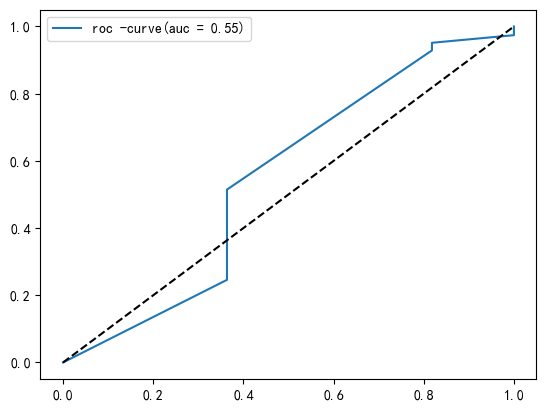

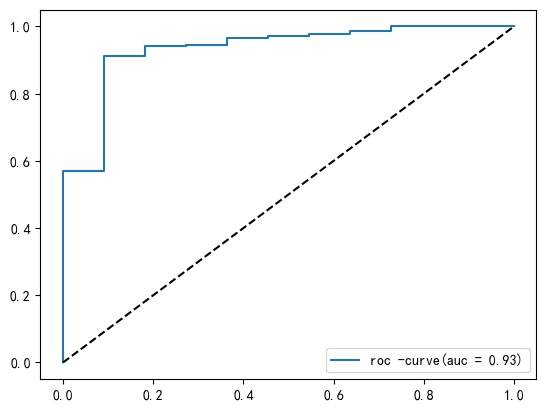

In [17]:
#**7、绘制出模型的AUC曲线下面积，并输出最优模型的权重系数，并对样本进行预测。（8分
from sklearn.metrics import auc, roc_curve

tree_proba = tree_best_model.predict_proba(X_Test)
lr_proba = lr_best_model.predict_proba(X_Test)
#**并输出最优模型的权重系数
print(lr_best_model.coef_)
print(tree_best_model.feature_importances_)
t1, t2, _ = roc_curve(y_test, tree_proba[:, 1])

t3, t4, _ = roc_curve(y_test, lr_proba[:, 1])

tree_auc = auc(t1, t2)
lr_auc = auc(t3, t4)

plt.plot(t1, t2, label = 'roc -curve(auc = %0.2f)' % tree_auc)
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.show()
plt.plot(t3, t4, label = 'roc -curve(auc = %0.2f)' % lr_auc)
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.show()